# Proyecto **final**

### Estructura del proyecto:

- **Descripción del problema**
- **Investigación de técnicas de preprocesamiento**
- **Modelo propio**
  - Importación de datos  
  - Exploración de datos  
  - Preprocesamiento de imágenes  
  - Modelos y ajuste de *hiperparámetros*  
  - Evaluación del desempeño del modelo final  
- **Modelo creado mediante un LLM**
  - Prueba y evaluación con un LLM





## Descripción del problema

**Problematica**: La clasificación de imágenes de resonancia magnética (MRI) es una tarea común en el análisis de patologías cerebrales. Sin embargo, debido a su frecuencia, pueden ocurrir errores humanos con consecuencias graves. Por ello, se busca reducir la carga del personal médico automatizando la clasificación de tumores. De esta forma, este proceso rutinario será asistido por un modelo predictivo, lo que permitirá disminuir el tiempo de diagnóstico. Además, esta solución será especialmente útil en regiones donde no se cuenta con profesionales capacitados para identificar este tipo de patologías.<br><br>

**Objetivo**: Crear un modelo de clasificacion el cual clasifique de la mejor manera posible distintas MRI, las categorias son las siguientes:


*   Glioma
*   Meningioma
*   Pituitario
*   No tumor





## Investigación de técnicas de preprocesamiento

### **Preprocesamiento de Imágenes**

El preprocesamiento de imágenes constituye una etapa crítica en sistemas de clasificación basados en aprendizaje profundo, particularmente en el dominio médico. En el contexto de la clasificación de tumores cerebrales a partir de imágenes de resonancia magnética (MRI), esta fase no solo tiene por objetivo adecuar las imágenes a los requerimientos computacionales del modelo, sino también preservar aquellos aspectos clínicamente relevantes que permiten una interpretación diagnóstica fiable, como la morfología tumoral, el edema o la distribución de estructuras intracraneales.

En este proyecto, se ha diseñado un pipeline de preprocesamiento alineado tanto con los requerimientos de arquitecturas de visión por computador como DINOv2, como con las exigencias del análisis clínico de resonancias cerebrales. A través de una secuencia cuidadosamente seleccionada de transformaciones, se busca reducir la variabilidad técnica del conjunto de datos sin comprometer su valor diagnóstico.

####**Redimensionamiento a 224x224 píxeles**

El primer paso consistió en la normalización del tamaño de las imágenes a una resolución fija de 224×224 píxeles. Este tamaño ha sido adoptado como estándar en arquitecturas preentrenadas como Vision Transformers o ResNet, y su adopción en este proyecto garantiza la compatibilidad estructural con modelos como DINOv2. Desde una perspectiva médica, estudios previos han demostrado que esta resolución permite conservar detalles anatómicos suficientes para diferenciar entre tipos de tumores, incluso aquellos cuya manifestación morfológica es sutil. Además, el uso de técnicas de interpolación adecuadas minimiza la distorsión geométrica y asegura la preservación de las relaciones espaciales intracraneales.

####**Conversión a representación numérica continua**

Una vez uniformizado el tamaño, las imágenes fueron transformadas a un formato numérico adaptado al procesamiento por redes neuronales profundas. Esta representación continúa permite que las intensidades de píxel sean interpretadas de manera eficiente por el modelo, promoviendo una mejor propagación del gradiente durante el entrenamiento. Además, la escala a un rango entre 0 y 1 reduce el riesgo de saturación y mantiene intactas las diferencias de intensidad entre tejidos, esenciales en la detección de anomalías intracraneales.

####**Simulación de variaciones de orientación**

Dado que en la práctica clínica pueden existir variaciones menores en la posición del paciente o el ángulo del escáner, se incluyó una transformación que simula rotaciones leves. Esta estrategia mejora la capacidad del modelo para identificar patrones tumorales de manera robusta ante cambios sutiles en la orientación. Desde el punto de vista médico, se ha demostrado que rotaciones controladas dentro de un rango reducido no afectan la fidelidad diagnóstica, y desde el enfoque computacional, esta técnica actúa como una forma de aumento de datos que favorece la generalización.

####**Normalización estadística basada en el modelo preentrenado**

La fase final del preprocesamiento consistió en aplicar una normalización basada en las estadísticas del conjunto de datos original con el que fue entrenado el modelo utilizado. Esta estrategia asegura que las imágenes procesadas mantengan una distribución similar a la de los datos originales del preentrenamiento, mejorando así la transferencia de conocimiento. Esta etapa también permite eliminar variaciones no diagnósticas en brillo o contraste, típicas de diferencias entre escáneres, facilitando que el modelo enfoque su atención en patrones verdaderamente patológicos.

Puesto que las imágenes de resonancia magnética son originalmente en escala de grises, se replicó el canal de intensidad en tres matrices idénticas para generar una imagen compatible con modelos preentrenados que esperan entradas con tres canales. Esta práctica ha sido ampliamente validada en la literatura y no introduce artefactos visuales, preservando completamente el contenido clínico de la imagen.

###**División estratificada del conjunto de datos**

Finalmente, el conjunto de imágenes fue segmentado en subconjuntos de entrenamiento, validación y prueba, utilizando una estrategia de partición estratificada. Esta división asegura que la proporción de cada clase tumoral se mantenga constante a través de los diferentes subconjuntos, evitando sesgos en el entrenamiento y evaluación del modelo. Esta medida es especialmente importante en datasets médicos, donde algunas clases representan patologías poco frecuentes pero clínicamente relevantes, cuya detección precisa puede tener consecuencias significativas en la práctica médica.

En su conjunto, estas transformaciones permiten preparar las imágenes de manera que se mantenga su valor clínico, se reduzca el sesgo técnico y se maximice el rendimiento del modelo en contextos reales de diagnóstico.

####**Transformaciones no aplicadas**

A pesar de la disponibilidad de múltiples técnicas de aumento de datos en visión por computador, el diseño del pipeline deliberadamente excluyó aquellas transformaciones que podrían comprometer la validez clínica de las imágenes. Por ejemplo, el recorte aleatorio podría eliminar regiones tumorales críticas, mientras que transformaciones como el reflejo horizontal podrían alterar la lateralidad cerebral, un parámetro vital en neurología. Asimismo, alteraciones como el ajuste de brillo o la introducción de ruido gaussiano podrían distorsionar las intensidades naturales de los tejidos blandos, afectando la diferenciación entre sustancia blanca, sustancia gris o líquido cefalorraquídeo.

Estas decisiones fueron fundamentadas tanto en criterios clínicos como en evidencia empírica, subrayando la importancia de adaptar el preprocesamiento al dominio médico en lugar de aplicar técnicas genéricas sin consideración del contexto.


#### **Referencias**


•	Evaluating the Impact of Intensity Normalization on MR Image. (2019). PLOS ONE. https://pmc.ncbi.nlm.nih.gov/articles/PMC6758567/

• Medical image preprocessing for deep learning. (2023). Journal of Medical Imaging and Health Informatics, 13(4). https://pmc.ncbi.nlm.nih.gov/articles/PMC10662291/

• Brain MRI Dataset resized to 224x224. (2022). Croatian Scientific Bibliography. https://hrcak.srce.hr/file/454546

• Brain tumor classification from MRI scans. (2024). Journal of Imaging Science and Technology, 68(1). https://pmc.ncbi.nlm.nih.gov/articles/PMC10882068/

• Brain Tumor Classification Framework Using Magnetic MRI. (2023). Applied Sciences, 13(18), 10521. https://www.mdpi.com/2076-3417/13/18/10521

•	Hussein, S., Gillies, R. J., Cao, K., Song, Y., & Bagci, U. (2022). Clinical guidelines for developing AI in radiology: Evaluation, robustness, and reproducibility. Radiology: Artificial Intelligence, 4(6). https://pubs.rsna.org/doi/full/10.1148/ryai.220061

•	PyTorch. (2024). torchvision.transforms — Torchvision main documentation. https://pytorch.org/vision/stable/transforms.html

•	Hugging Face. (2024). DINOv2 model documentation. https://huggingface.co/docs/transformers/model_doc/dinov2




# Modelo Propio

##  Importacion de datos

**Librerias**: Usaremos pytorch como libreria motor para la red neuronal y el manejo del dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

base_dir = '/content/drive/My Drive/Proyecto/proyecto-final-iis-2025-1-unal/ISI_dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
labels_path = os.path.join(base_dir, 'train_labels.csv')




## Exploracion de los datos

Hay 5718 Imagenes MRI

In [ ]:

import pandas as pd

labels = pd.read_csv(labels_path)

labels.shape
print(labels.head(30))
labels.shape


             id       label
0   img0001.jpg  meningioma
1   img0002.jpg      glioma
2   img0003.jpg   pituitary
3   img0004.jpg      glioma
4   img0005.jpg   pituitary
5   img0006.jpg   pituitary
6   img0007.jpg     notumor
7   img0008.jpg  meningioma
8   img0009.jpg   pituitary
9   img0010.jpg      glioma
10  img0011.jpg  meningioma
11  img0012.jpg     notumor
12  img0013.jpg     notumor
13  img0014.jpg   pituitary
14  img0015.jpg      glioma
15  img0016.jpg     notumor
16  img0017.jpg     notumor
17  img0018.jpg  meningioma
18  img0019.jpg  meningioma
19  img0020.jpg     notumor
20  img0021.jpg      glioma
21  img0022.jpg     notumor
22  img0023.jpg     notumor
23  img0024.jpg  meningioma
24  img0025.jpg  meningioma
25  img0026.jpg      glioma
26  img0027.jpg     notumor
27  img0028.jpg   pituitary
28  img0029.jpg   pituitary
29  img0030.jpg  meningioma


(5718, 2)

Aqui notamos como la clase de mayor numero es la de "notumor", y la de menor "glioma"

In [ ]:
class_counts = labels['label'].value_counts()
class_counts

,count
label,
notumor,1660
pituitary,1418
meningioma,1322
glioma,1318


 Visualización de imágenes por clase

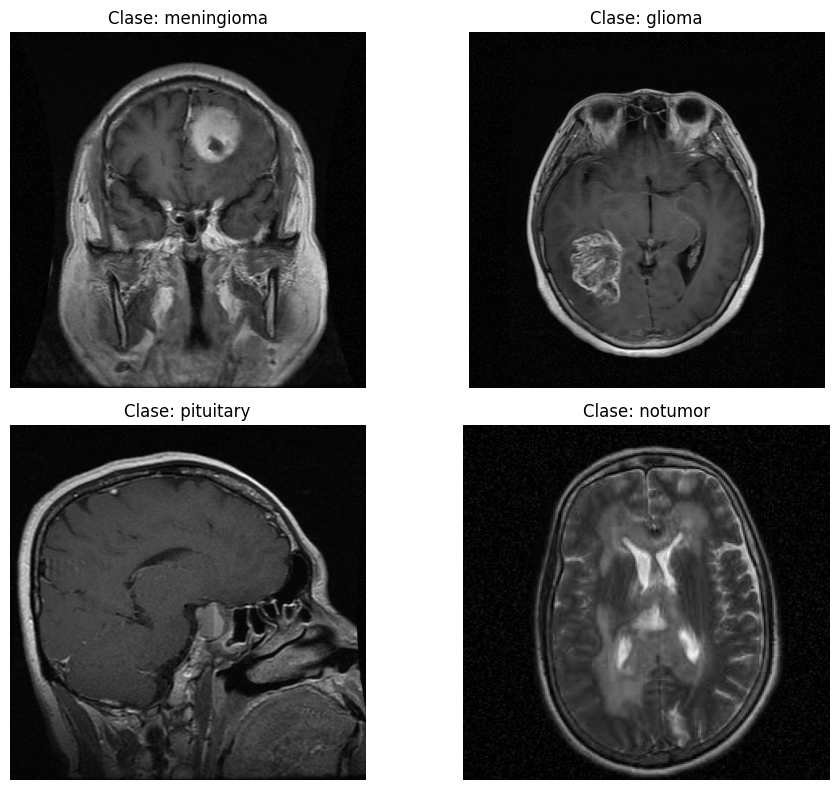

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Obtener un índice para cada clase.
# Utilizaremos la primera aparición de cada etiqueta en el DataFrame labels.
class_indices = {}
for index, row in labels.iterrows():
    label = row['label']
    if label not in class_indices:
        class_indices[label] = index
    if len(class_indices) == 4:
        break

plt.figure(figsize=(10, 8))

for i, (label, idx) in enumerate(class_indices.items()):
    img_name = labels.iloc[idx]['id']
    img_path = os.path.join(train_dir, img_name)

    try:
        image = Image.open(img_path)
        plt.subplot(2, 2, i + 1) # 2 filas, 2 columnas
        plt.imshow(image, cmap='gray')
        plt.title(f"Clase: {label}")
        plt.axis('off')
    except FileNotFoundError:
        print(f"Imagen no encontrada en la ruta: {img_path}")
    except Exception as e:
        print(f"Error al procesar la imagen {img_name}: {e}")

plt.tight_layout()
plt.show()

Imagenes Curiosas:

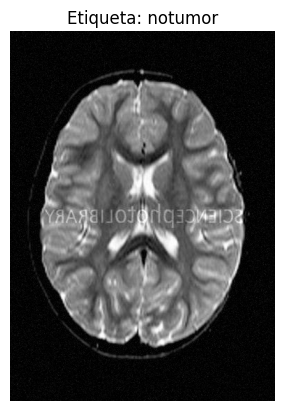

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

i = 711


# Obtener el nombre del archivo y su etiqueta
img_name = labels.iloc[i]['id']
label = labels.iloc[i]['label']

# Construir la ruta completa de la imagen
img_path = os.path.join(train_dir, img_name)

# Cargar y mostrar la imagen
image = Image.open(img_path)

plt.imshow(image, cmap = 'gray')
plt.title(f"Etiqueta: {label}")
plt.axis('off')
plt.show()

Algunas imagenes del set de entrenamiento tenian marcas de agua por encima de la radiografia

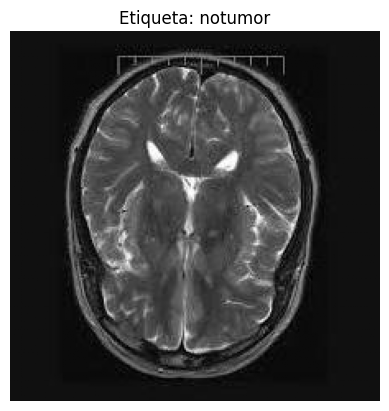

In [ ]:
i = 1064


# Obtener el nombre del archivo y su etiqueta
img_name = labels.iloc[i]['id']
label = labels.iloc[i]['label']

# Construir la ruta completa de la imagen
img_path = os.path.join(test_dir, img_name)

# Cargar y mostrar la imagen
image = Image.open(img_path)

plt.imshow(image, cmap = 'gray')
plt.title(f"Etiqueta: {label}")
plt.axis('off')
plt.show()

Sin embargo no se consideró eliminarlas ya que dentro de las imágenes de test tambien habian algunas con estas caracteristicas, van a ser utiles para el entrenamiento

Tamaño de la imagen:

In [ ]:
print(image.mode)
print(image.size)

L
(225, 225)


In [ ]:
from collections import Counter


# Obtener todos los nombres de archivo en la carpeta
image_files = os.listdir(train_dir)

# Lista para guardar tamaños
sizes = []

# Recorrer las imágenes
for img_file in image_files:
    img_path = os.path.join(train_dir, img_file)
    try:
        with Image.open(img_path) as img:
            sizes.append(img.size)  # (ancho, alto)
    except:
        print(f"Error al abrir {img_file}")

# Contar ocurrencias de cada tamaño
size_counts = Counter(sizes)

# Mostrar en DataFrame ordenado
size_df = pd.DataFrame(size_counts.items(), columns=['Tamaño (ancho, alto)', 'Cantidad'])
size_df = size_df.sort_values(by='Cantidad', ascending=False)

print(size_df)



    Tamaño (ancho, alto)  Cantidad
0             (512, 512)      3839
1             (225, 225)       280
21            (630, 630)        77
5             (236, 236)        64
7             (201, 251)        50
..                   ...       ...
354           (421, 486)         1
355           (439, 512)         1
356           (453, 496)         1
357           (286, 356)         1
358           (225, 218)         1

[359 rows x 2 columns]


Notamos que los datos son muy hetereogeneos, tenemos 359 diferentes tamaños de imagenes, siendo la mas comun 512 x 512, debemos normalizar.

In [ ]:
# Tomar una muestra de imágenes
sample_images = os.listdir(train_dir)[970:1000]

for img_name in sample_images:
    img_path = os.path.join(train_dir, img_name)
    with Image.open(img_path) as img:
            # Verificar canal de color
            print(f"Imagen: {img_name}, Canal de color (Mode): {img.mode}")
            img_array = np.array(img)
            print(f"  Rango de intensidad: Min={img_array.min()}, Max={img_array.max()} \n")


Imagen: img5702.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=255 

Imagen: img5715.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=253 

Imagen: img5701.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=255 

Imagen: img5698.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=255 

Imagen: img5716.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=144 

Imagen: img5718.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=255 

Imagen: img5717.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=255 

Imagen: img5711.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=255 

Imagen: img5708.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=255 

Imagen: img5694.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=255 

Imagen: img5700.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=254 

Imagen: img5691.jpg, Canal de color (Mode): L
  Rango 

Vemos como la mayoría de tus imágenes son imágenes de escala de grises que utilizan casi todo el rango de intensidad

## Preprocesamiento de imágenes


Iniciamos eliminando algunas imagenes corruptas que a nuestro criterio, no eran utiles para los datos de entrenamiento y por lo contrario podrian generar problemas en la red.

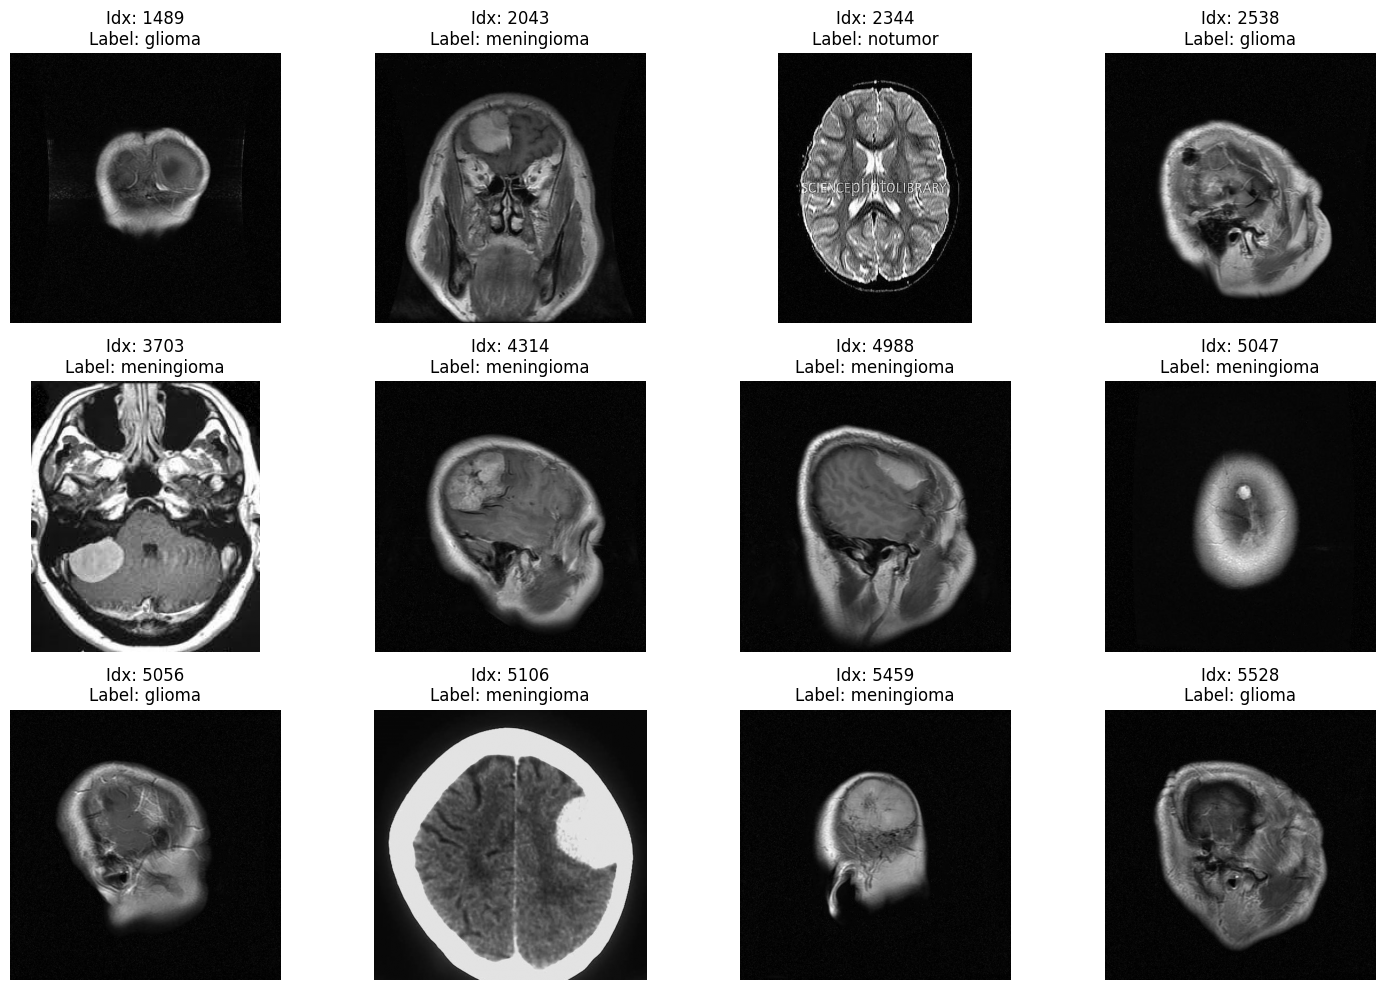

In [ ]:
indices_to_show = [1489, 2043, 2344, 2538, 3703, 4314, 4988, 5047, 5056, 5106, 5459, 5528]

plt.figure(figsize=(15, 10)) # Ajusta el tamaño para mostrar varias imágenes

for i, idx in enumerate(indices_to_show):
    if idx < len(labels): # Asegurarse de que el índice es válido
        img_name = labels.iloc[idx]['id']
        label = labels.iloc[idx]['label']
        img_path = os.path.join(train_dir, img_name)

        try:
            image = Image.open(img_path)
            plt.subplot(3, 4, i + 1) # 3 filas, 4 columnas
            plt.imshow(image, cmap='gray')
            plt.title(f"Idx: {idx}\nLabel: {label}")
            plt.axis('off')
        except FileNotFoundError:
            print(f"Imagen no encontrada en la ruta: {img_path}")
        except Exception as e:
            print(f"Error al procesar la imagen {img_name}: {e}")
    else:
        print(f"Índice {idx} fuera de rango del DataFrame.")

plt.tight_layout()
plt.show()

Algunas de estas son confusas otras tienen marcas de agua demasiado marcadas, sin embargo seria util confirmar con un experto sobre la utilidad de estas radiografias

In [ ]:

indices_to_remove = [1489, 2043, 2344, 2538, 3703, 4314, 4988, 5047, 5056, 5106, 5459, 5528]


filtered_labels = labels.drop(indices_to_remove).reset_index(drop=True)


Tambien generamos la secuencia de transformaciones para que la imagen este Lista para ser usada como entrada en el modelo DinoV2 y la red neuronal

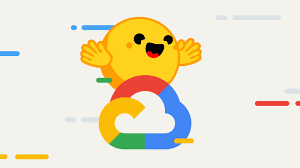


Entre las transformaciones se incluyen:


*   Las imágenes se redimensionan a 224x224 píxeles
*   Se rotan aleatoriamente hasta 15 grados
*   Se convierten a tensor escalando píxeles a [0,1]
*   Se normalizan usando el preprocesador de DINOv2




In [ ]:
# PyTorch
import torch
from torchvision import transforms

# Hugging Face Transformers para DINOv2
from transformers import AutoImageProcessor

processor = AutoImageProcessor.from_pretrained("facebook/dinov2-base")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(degrees=15),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: processor(images=x, return_tensors="pt", do_rescale=False)["pixel_values"][0])
])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


## Modelo y ajuste de hiperparámetros



*   Decidimos utilizar las funcionalidades de pytorch junto con el modelo preentrenado de DinoV2. (Transfer learning)




1) Preparacion del dataset para compatibilidad con pytorch

In [ ]:
from torch.utils.data import Dataset

class TumorDataset(Dataset):
    def __init__(self, dataframe, images_dir, transform=None):
        self.df = dataframe
        self.images_dir = images_dir
        self.transform = transform
        self.label_to_idx = {
            'notumor': 0,
            'pituitary': 1,
            'meningioma': 2,
            'glioma': 3
        }

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.df.iloc[idx]['id']   # ← cambio aquí
        label_name = self.df.iloc[idx]['label']
        label = self.label_to_idx[label_name]

        img_path = os.path.join(self.images_dir, img_name)
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label

3) Creamos el Dataset y el Dataloader para Los datos de entrenamiento, validacion y test

De esta manera confirmamos que el modelo no se esta aprendiendo de memoria nuestras imagenes de entrenamiento

In [ ]:
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# Primero dividimos entre entrenamiento (80%) y lo demás (20%)
train_df, temp_df = train_test_split(
    filtered_labels,
    test_size=0.2,
    random_state=918,
    stratify=filtered_labels['label']
)

# Luego dividimos lo demás entre validación y test (10% y 10%)
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    random_state=918,
    stratify=temp_df['label']
)

train_dataset = TumorDataset(train_df, train_dir, transform=transform)
val_dataset = TumorDataset(val_df, train_dir, transform=transform)
test_dataset = TumorDataset(test_df, train_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
images, filtered_labels = next(iter(train_loader))
print("forma de las imágenes:", images.shape)
print("Etiquetas:", labels[:8])

forma de las imágenes: torch.Size([32, 3, 224, 224])
Etiquetas:             id       label
0  img0001.jpg  meningioma
1  img0002.jpg      glioma
2  img0003.jpg   pituitary
3  img0004.jpg      glioma
4  img0005.jpg   pituitary
5  img0006.jpg   pituitary
6  img0007.jpg     notumor
7  img0008.jpg  meningioma


Tenemos lotes con 32 imagenes, 3 canales de color RGb Y de tamaño 224 x 224.


In [ ]:
print("Train class distribution:\n", train_df['label'].value_counts())
print("Validation class distribution:\n", val_df['label'].value_counts())
print("Test class distribution:\n", test_df['label'].value_counts())

Train class distribution:
 label
notumor       1327
pituitary     1134
meningioma    1052
glioma        1051
Name: count, dtype: int64
Validation class distribution:
 label
notumor       166
pituitary     142
glioma        132
meningioma    131
Name: count, dtype: int64
Test class distribution:
 label
notumor       166
pituitary     142
meningioma    132
glioma        131
Name: count, dtype: int64


### 4) Pasamos las imagenes por Dino V2

Cargamos el modelo


In [ ]:
from transformers import AutoModel

dinov2 = AutoModel.from_pretrained("facebook/dinov2-base")

for param in dinov2.parameters():
    param.requires_grad = False  # <-- Esto congela DINOv2

dinov2.eval()  # No vamos a entrenar DINOv2
dinov2 = dinov2.to("cuda" if torch.cuda.is_available() else "cpu")

config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Pasamos un batch de imagenes por DinoV2 y obtenemos sus caracteristicas (CLS), esto es util para establecer el tamaño de nuestra red



In [ ]:
# Obtener un batch del dataloader
images, labels = next(iter(train_loader))
images = images.to(dinov2.device)

# Desactivar gradientes (no vamos a entrenar DINOv2)
with torch.no_grad():
    outputs = dinov2(pixel_values=images)
    features = outputs.last_hidden_state[:, 0, :]  # ---> Leemos la iinformacion del primer vector, que es donde se resume la informacion de toda la imagen.
print(features.shape)

torch.Size([32, 768])


DinoV2, nos describe una imagen con un vector de 768 dimensiones

5) Creamos una red neuronal interprete

Esta es una red neuronal simple que utilizamos unicamente en el entorno del colab

In [ ]:
import torch.nn as nn

classifier = nn.Sequential(
    nn.Linear(768, 256),
    nn.ReLU(),
    nn.Linear(256, 4)
).to(dinov2.device)

La red neuronal que utilizamos de manera local fue la siguiente:

Utilizamos 2 tecnicas de regularización:


*   **Dropout**: Significa la probabilidad de que una neurona se apague, esto ayuda a que las neuronas por si mismas sean menos dependientes a las demas previniendo el sobreajuste.
*   **Batch Normalization**: No tenemos muy claro su funcionamiento en si pero acelera el entrenamiento y la convergencia. Nos dió resultado 🙂



In [ ]:
classifier_local = nn.Sequential(
    nn.Linear(768, 1024),
    nn.BatchNorm1d(1024),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(1024, 512),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, 256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Linear(256, 4)
).to(dinov2.device)

Resumen de la red neuronal propia

In [ ]:
from torchsummary import summary

# Mueve el modelo a la GPU o CPU de lo contrario
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classifier.to(device)

# DINOv2 genera vectores de tamaño 768
summary(classifier_local, input_size=(768,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1024]         787,456
       BatchNorm1d-2                 [-1, 1024]           2,048
              ReLU-3                 [-1, 1024]               0
           Dropout-4                 [-1, 1024]               0
            Linear-5                  [-1, 512]         524,800
       BatchNorm1d-6                  [-1, 512]           1,024
              ReLU-7                  [-1, 512]               0
           Dropout-8                  [-1, 512]               0
            Linear-9                  [-1, 256]         131,328
      BatchNorm1d-10                  [-1, 256]             512
             ReLU-11                  [-1, 256]               0
           Linear-12                    [-1, 4]           1,028
Total params: 1,448,196
Trainable params: 1,448,196
Non-trainable params: 0
---------------------------

6) Definimos funcion de perdida y el optimizador

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=1e-4, weight_decay=1e-5)

weight_decay ayuda al clasificador a generalizar mejor y evitar sobreajustarse penalizando pesos grandes

7) Funcion de entrenamiento

In [ ]:
def train_loop(dataloader, dinov2, classifier, loss_fn, optimizer, device):
    classifier.train()
    dinov2.eval()  # No entrenamos DINOv2

    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (images, labels) in enumerate(dataloader):
        images, labels = images.to(device), labels.to(device)

        with torch.no_grad():
            try:
                outputs = dinov2(images)
                features = outputs.last_hidden_state[:, 0, :]  # CLS token
            except Exception as e:
                print(f"Error en DINOv2 forward pass: {e}")
                continue

        logits = classifier(features)
        loss = loss_fn(logits, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        correct += (logits.argmax(1) == labels).sum().item()
        total += labels.size(0)

        if batch_idx % 10 == 0:
            print(f"\t[Lote {batch_idx}] Pérdida: {loss.item():.4f}")

    avg_loss = running_loss / len(dataloader)
    accuracy = correct / total
    print(f"\t Entrenamiento: {(100 * accuracy):.1f}% / Pérdida: {avg_loss:.4f}")
    return avg_loss, accuracy

8) Funcion de validacion

In [ ]:
def val_loop(dataloader, dinov2, classifier, loss_fn, device):
    classifier.eval()
    dinov2.eval()

    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(dataloader):
            images, labels = images.to(device), labels.to(device)

            try:
                outputs = dinov2(images)
                features = outputs.last_hidden_state[:, 0, :]
            except Exception as e:
                print(f"Error en DINOv2 durante validación: {e}")
                continue

            logits = classifier(features)
            loss = loss_fn(logits, labels)

            running_loss += loss.item()
            correct += (logits.argmax(1) == labels).sum().item()
            total += labels.size(0)

    avg_loss = running_loss / len(dataloader)
    accuracy = correct / total
    print(f"\t Validación: {(100 * accuracy):.1f}% / Pérdida: {avg_loss:.4f}\n")
    return avg_loss, accuracy

9) Entrenamos la red neuronal

En el modelo utilizado para la competencia se hicieron 32 EPOCHS en un entorno local. El uso de la GPU de colab es limitado, por eso se decide mostrar un modelo disntinto con solo 8 EPOCHS

Elegimos el numero de EPOCHS con la siguiente logica, si luego de 8 iteraciones el accuracy de la prediccion sobre los datos de validacion no mejoraba, el entrenamiento se detenia. La red neuronal no mostro mejora despues de 32 EPOCHS

In [ ]:
#EPOCHS = 32
EPOCHS = 8
best_val_acc = 0.0

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(EPOCHS):
    print(f"\n EPOCHS {epoch + 1}/{EPOCHS}")
    print("-" * 40)

    train_loss, train_acc = train_loop(train_loader, dinov2, classifier, criterion, optimizer, device)
    val_loss, val_acc = val_loop(val_loader, dinov2, classifier, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(classifier.state_dict(), "/content/drive/MyDrive/Proyecto/mejor_modelo(Colab).pth")
        print("\t Mejor modelo guardado con accuracy:", f"{100 * val_acc:.2f}%")

print("\n ¡Entrenamiento completo!")


 EPOCHS 1/8
----------------------------------------
	[Lote 0] Pérdida: 1.3818
	[Lote 10] Pérdida: 1.0307
	[Lote 20] Pérdida: 1.0412
	[Lote 30] Pérdida: 0.7865
	[Lote 40] Pérdida: 0.6916
	[Lote 50] Pérdida: 0.7529
	[Lote 60] Pérdida: 0.5378
	[Lote 70] Pérdida: 0.6500
	[Lote 80] Pérdida: 0.5980
	[Lote 90] Pérdida: 0.5078
	[Lote 100] Pérdida: 0.5650
	[Lote 110] Pérdida: 0.5576
	[Lote 120] Pérdida: 0.4425
	[Lote 130] Pérdida: 0.4212
	[Lote 140] Pérdida: 0.4649
	 Entrenamiento: 76.2% / Pérdida: 0.6664
	 Validación: 85.6% / Pérdida: 0.4329

	 Mejor modelo guardado con accuracy: 85.64%

 EPOCHS 2/8
----------------------------------------
	[Lote 0] Pérdida: 0.5088
	[Lote 10] Pérdida: 0.3775
	[Lote 20] Pérdida: 0.4010
	[Lote 30] Pérdida: 0.2620
	[Lote 40] Pérdida: 0.5079
	[Lote 50] Pérdida: 0.3375
	[Lote 60] Pérdida: 0.3219
	[Lote 70] Pérdida: 0.3265
	[Lote 80] Pérdida: 0.2976
	[Lote 90] Pérdida: 0.4198
	[Lote 100] Pérdida: 0.2989
	[Lote 110] Pérdida: 0.4091
	[Lote 120] Pérdida: 0.1808
	[Lot

## Evaluacion del desempeño del modelo (Colab)

  Graficamos el accuracy y loss para ver claramente la curva de aprendizaje

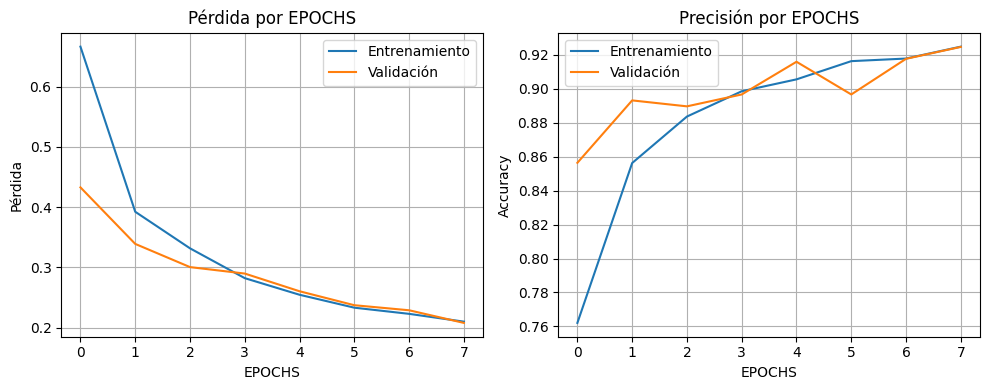

In [ ]:
# Gráfica de Loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Entrenamiento')
plt.plot(val_losses, label='Validación')
plt.title('Pérdida por EPOCHS')
plt.xlabel('EPOCHS')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Gráfica de Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Entrenamiento')
plt.plot(val_accuracies, label='Validación')
plt.title('Precisión por EPOCHS')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Durante estas pocas iteraciones no se evidencia sobreajuste claro; sin embargo, en la iteración 5, el *accuracy* de la validación estuvo por debajo que el de entrenamiento, pero este vuelve a valores de aprendizaje normales en las siguientes iteraciones.

Hacemos una prueba final en nuestro subconjunto de Test, utilizando el modelo entrenado localmente

In [ ]:
classifier.load_state_dict(torch.load("/content/drive/MyDrive/Proyecto/mejor_modelo(3).pth"))
classifier.to(device)
classifier.eval()

Sequential(
  (0): Linear(in_features=768, out_features=1024, bias=True)
  (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.4, inplace=False)
  (4): Linear(in_features=1024, out_features=512, bias=True)
  (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): Dropout(p=0.3, inplace=False)
  (8): Linear(in_features=512, out_features=256, bias=True)
  (9): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): Linear(in_features=256, out_features=4, bias=True)
)

In [ ]:
def test_loop(dataloader, dinov2, classifier, loss_fn, device):
    classifier.eval()
    dinov2.eval()

    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            try:
                outputs = dinov2(images)
                features = outputs.last_hidden_state[:, 0, :]
            except Exception as e:
                print(f"Error en DINOv2 forward pass: {e}")
                continue

            logits = classifier(features)
            loss = loss_fn(logits, labels)

            running_loss += loss.item()
            correct += (logits.argmax(1) == labels).sum().item()
            total += labels.size(0)

    avg_loss = running_loss / len(dataloader)
    accuracy = correct / total

    print(f"Evaluación en test: {100 * accuracy:.2f}% / Pérdida: {avg_loss:.4f}")
    return avg_loss, accuracy

In [ ]:
test_loss, test_acc = test_loop(test_loader, dinov2, classifier, criterion, device)

Evaluación en test: 97.38% / Pérdida: 0.0722


97.38% de precision, el modelo esta clasificando de manera correcta la gran mayoria de los datos de test. 🙂

### Metricas

Librerias a importar para las metricas

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
from torch.nn.functional import softmax

labels_names = ['notumor', 'pituitary', 'meningioma', 'glioma']
idx_to_class = {0: 'notumor', 1: 'pituitary', 2: 'meningioma', 3: 'glioma'}

all_labels = []
all_preds = []
all_probs = []

classifier.eval()
dinov2.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = dinov2(images)
        features = outputs.last_hidden_state[:, 0, :]
        logits = classifier(features)
        probs = softmax(logits, dim=1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(torch.argmax(probs, dim=1).cpu().numpy())
        all_probs.extend(probs.cpu().numpy())


Recall (macro)

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(all_labels, all_preds, average="macro")
print(f"Recall macro: {recall:.4f}")

Recall macro: 0.9717


Recall por clase

In [ ]:

print(classification_report(all_labels, all_preds, target_names=labels_names))

              precision    recall  f1-score   support

     notumor       0.99      1.00      1.00       166
   pituitary       0.97      0.99      0.98       142
  meningioma       0.96      0.94      0.95       132
      glioma       0.96      0.95      0.96       132

    accuracy                           0.97       572
   macro avg       0.97      0.97      0.97       572
weighted avg       0.97      0.97      0.97       572



Accuracy Global

In [ ]:
acc = accuracy_score(all_labels, all_preds)
print(f"Accuracy global: {acc:.4f}")

Accuracy global: 0.9738


Metrica compuesta

In [ ]:
composite = (acc + recall) / 2
print(f"Métrica compuesta: {composite:.4f}")

Métrica compuesta: 0.9728


Matriz de confusion

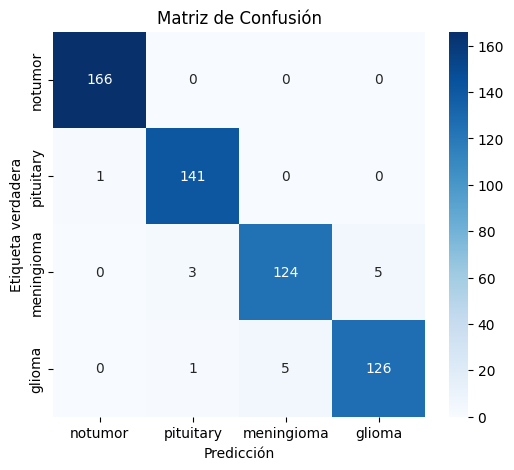

In [ ]:


cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_names, yticklabels=labels_names)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta verdadera")
plt.title("Matriz de Confusión")
plt.show()


Aqui vemos un dato muy interesante y positivo del modelo. No clacifico como 'sin tumor' ningún caso real de tumor en el conjunto de prueba. Aspecto critico para el diagnostico medico.

Curva ROC

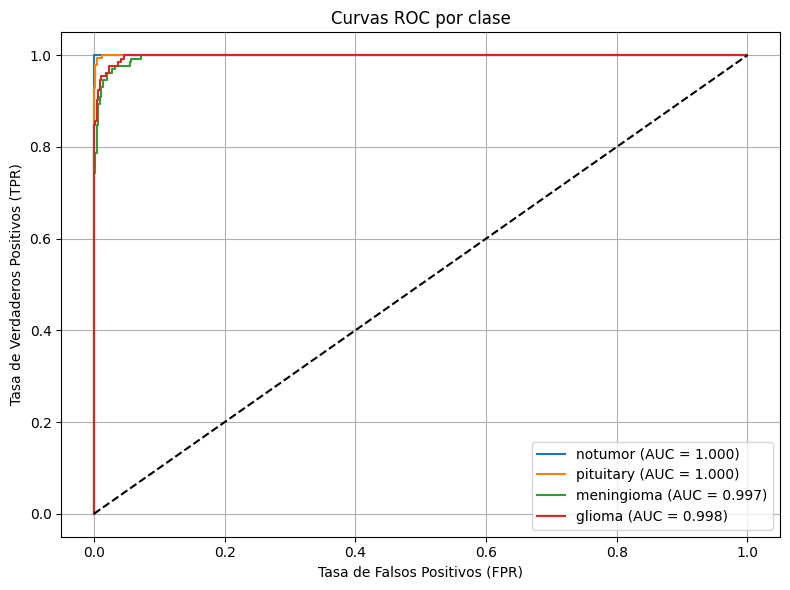

In [ ]:
y_true_bin = label_binarize(all_labels, classes=[0, 1, 2, 3])
all_probs = np.array(all_probs)
n_classes = y_true_bin.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], all_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"{labels_names[i]} (AUC = {roc_auc[i]:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curvas ROC por clase")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Vizualizacion de errores

Retornamos las imagenes a un estado original

In [ ]:
imagenet_mean = [0.485, 0.456, 0.406]  #valores usados por DINO v2 para normalizar las imagenes
imagenet_std = [0.229, 0.224, 0.225]

def denormalize_dino(tensor):
    mean = torch.tensor(imagenet_mean).view(3, 1, 1).to(tensor.device)
    std = torch.tensor(imagenet_std).view(3, 1, 1).to(tensor.device)
    return tensor * std + mean

In [ ]:
wrong_images = []
wrong_preds = []
wrong_labels = []

classifier.eval()
dinov2.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = dinov2(images)
        features = outputs.last_hidden_state[:, 0, :]
        logits = classifier(features)
        preds = logits.argmax(1)

        # Comparar predicciones con etiquetas reales
        for i in range(len(labels)):
            if preds[i] != labels[i]:
                wrong_images.append(images[i].cpu())
                wrong_preds.append(preds[i].item())
                wrong_labels.append(labels[i].item())

Ejemplo de 3 imagenes mal etiquetadas

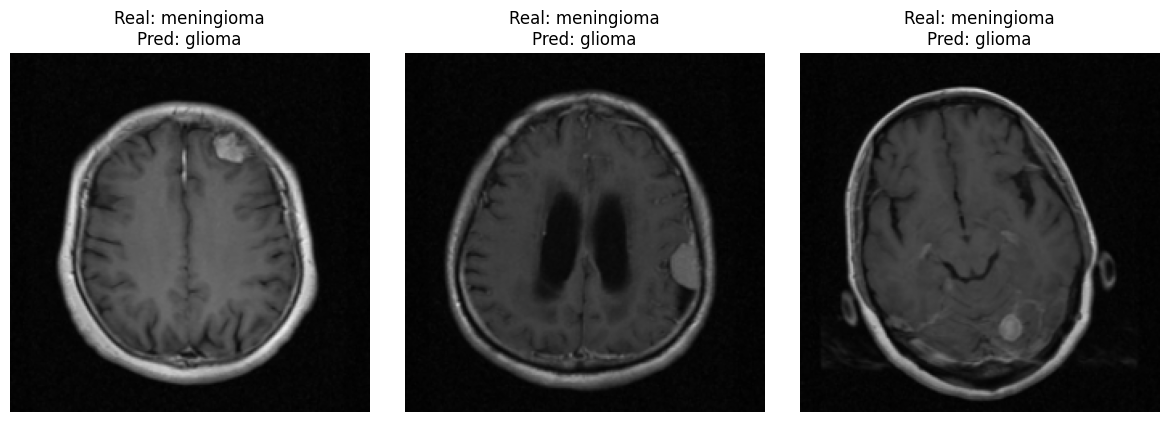

In [ ]:
n = 3
plt.figure(figsize=(12, 8))

for i in range(n):
    img = denormalize_dino(wrong_images[i]).clamp(0, 1)  # Asegura valores en [0,1]
    img = img.permute(1, 2, 0).cpu().numpy()              # [Canal, Height, Width] → [H, W, C]

    true_label = idx_to_class[wrong_labels[i]]
    pred_label = idx_to_class[wrong_preds[i]]

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Real: {true_label}\nPred: {pred_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## Generar CSV pera el test real

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classifier.load_state_dict(torch.load("/content/drive/MyDrive/Proyecto/mejor_modelo(3).pth"))
classifier.eval()
dinov2.eval()

idx_to_label = {0: "notumor", 1: "pituitary", 2: 'meningioma', 3: 'glioma'}

# Lista de archivos en test_dir
test_filenames = sorted(os.listdir(test_dir))

results = []

# Generar predicciones
with torch.no_grad():
    for filename in test_filenames:
        img_path = os.path.join(test_dir, filename)
        image = Image.open(img_path).convert("RGB")
        image = transform(image).unsqueeze(0).to(device) #La transformamos y le creamos la variable lote que sea de 1

        features = dinov2(image).last_hidden_state[:, 0, :]
        logits = classifier(features)
        predicted_class = torch.argmax(logits, dim=1).item()
        predicted_label = idx_to_label[predicted_class]

        results.append({"id": filename, "label": predicted_label})

# Guardar CSV
df_submission = pd.DataFrame(results)
df_submission.to_csv("submissionModel.csv", index=False)


## G. Evaluación del modelo LLM (Multimodal)

Esta sección presenta la evaluación del desempeño del modelo LLM (basado en análisis multimodal) en la clasificación de imágenes de resonancia magnética cerebral. El análisis incluye métricas clásicas de desempeño, una tabla de predicciones y reflexiones sobre el comportamiento observado.


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle


In [ ]:
# Cargar datos desde el archivo final integrado
merged_final_cleaned = pd.read_csv("/content/drive/My Drive/Proyecto/merged_llm_results_final.csv")
merged_final_cleaned.head()

,Unnamed: 0,image,llm_prediction,justification,id
0,0,img0001,notumor,"Lesiones mÃºltiples en sustancia blanca, patrÃ...",img0001
1,1,img0002,glioma,"Masa infiltrante con edema circundante, tÃ­pic...",img0002
2,2,img0003,pituitary,LesiÃ³n localizada en silla turca,img0003
3,3,img0004,notumor,"DistribuciÃ³n difusa, compatible con enfermeda...",img0004
4,4,img0005,meningioma,LesiÃ³n bien delimitada adyacente a la duramadre,img0005


In [ ]:
# Normalizar etiquetas para asegurar consistencia
merged_final_cleaned["llm_pediction"] = merged_final_cleaned["llm_prediction"].replace({
    "No tumor": "notumor", "Glioma": "glioma", "Pituitario": "pituitary", "Meningioma": "meningioma"
})


In [ ]:

y_true = labels['label'].head(30).reset_index(drop=True)
y_pred = merged_final_cleaned["llm_prediction"].head(30).reset_index(drop=True)

y_pred = y_pred.replace({
    "No tumor": "notumor", "Glioma": "glioma", "Pituitario": "pituitary", "Meningioma": "meningioma"
})

# Cálculo de métricas
accuracy = accuracy_score(y_true, y_pred)
recall_macro = recall_score(y_true, y_pred, average="macro")
composite_metric = (accuracy + recall_macro) / 2

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall macro: {recall_macro:.4f}")
print(f"Métrica compuesta (accuracy + recall_macro)/2: {composite_metric:.4f}")



Accuracy: 0.1667
Recall macro: 0.1677
Métrica compuesta (accuracy + recall_macro)/2: 0.1672


In [ ]:
# Create a DataFrame for comparison
comparison_df_metrics = pd.DataFrame({
    'True_Label': y_true,
    'Predicted_Label': y_pred
})

# Display the DataFrame
display(comparison_df_metrics)

,True_Label,Predicted_Label
0,meningioma,notumor
1,glioma,glioma
2,pituitary,pituitary
3,glioma,notumor
4,pituitary,meningioma
5,pituitary,notumor
6,notumor,glioma
7,meningioma,pituitary
8,pituitary,meningioma
9,glioma,notumor


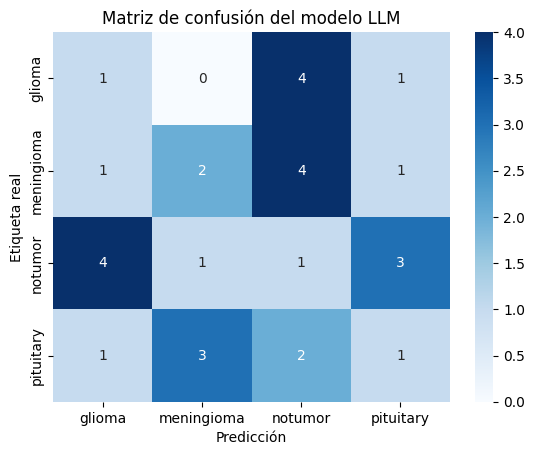

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_true, y_pred, labels=["glioma", "meningioma", "notumor", "pituitary"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["glioma", "meningioma", "notumor", "pituitary"], yticklabels=["glioma", "meningioma", "notumor", "pituitary"])
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de confusión del modelo LLM")
plt.show()


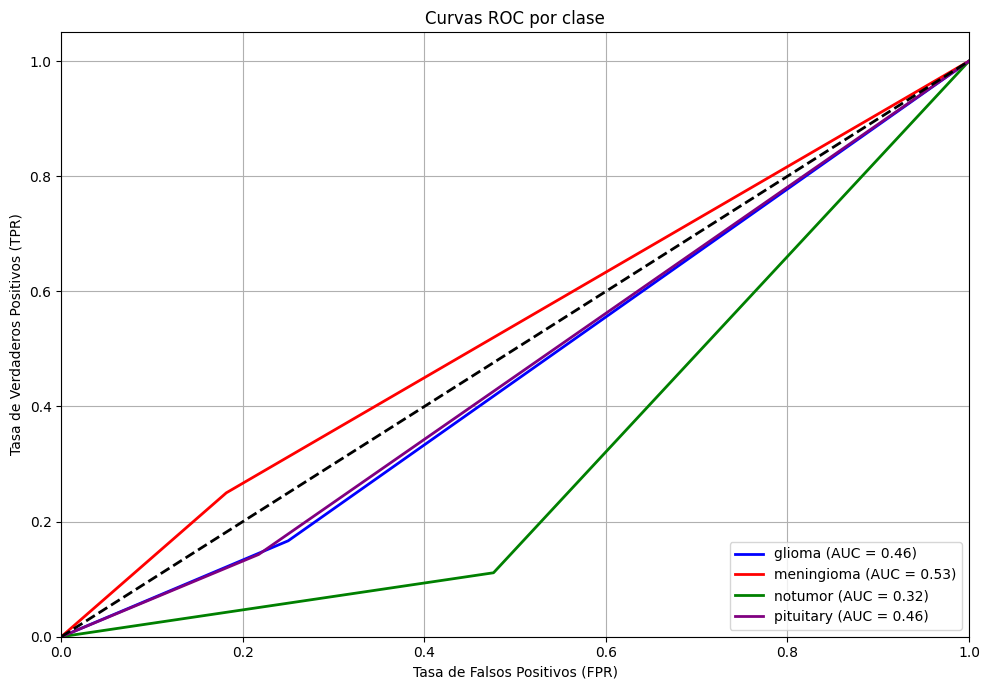

In [ ]:
# Curvas ROC
classes = sorted(y_true.unique())
y_true_bin = label_binarize(y_true, classes=classes)
y_pred_bin = label_binarize(y_pred, classes=classes)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i, cls in enumerate(classes):
    fpr[cls], tpr[cls], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[cls] = auc(fpr[cls], tpr[cls])

plt.figure(figsize=(10, 7))
colors = cycle(['blue', 'red', 'green', 'purple'])
for cls, color in zip(classes, colors):
    plt.plot(fpr[cls], tpr[cls], color=color, lw=2, label=f'{cls} (AUC = {roc_auc[cls]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curvas ROC por clase")
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()


### Análisis de desempeño del modelo LLM

El modelo LLM mostró un desempeño limitado en términos de exactitud y cobertura macro promedio. Aunque algunas clases como "notumor" lograron una buena tasa de detección, otras como "glioma" o "pituitary" presentaron confusión con categorías similares.

**Técnicas que ayudaron:** El uso de prompts enriquecidos con contexto clínico y formato de respuesta estructurado mejoró la coherencia de las respuestas. Sin embargo, no fue suficiente para garantizar una clasificación óptima.

**Limitaciones observadas:** El modelo presentó errores clínicos al confundir tumores con condiciones benignas o no tumorales. La falta de consistencia y el sesgo hacia clases mayoritarias también limitaron su confiabilidad.

**Ventajas sobre modelos tradicionales:** La principal ventaja del LLM fue su capacidad de razonamiento explícito, ofreciendo justificaciones clínicas en lenguaje natural. Además, no requiere entrenamiento y puede operar con bajo costo computacional, lo cual lo hace accesible para escenarios con recursos limitados.

**Consideraciones finales:** Dado que solo se evaluaron 30 imágenes, los resultados no deben generalizarse sin reservas. Aun así, este análisis resalta el potencial y las limitaciones actuales de modelos LLM en tareas clínicas de visión por computador.
